# College admissions

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

read a csv file

In [65]:
df=pd.read_csv('data.csv')
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


### data analysis

In [96]:
def barplot(column):
    df.groupby([column,'in_college']).size().unstack().plot(kind = 'bar',stacked=True)
    plt.show()

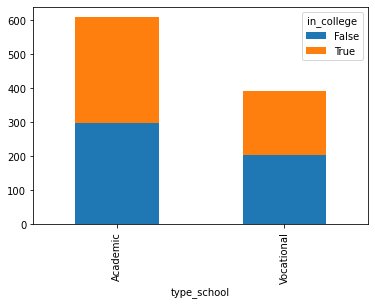

In [97]:
barplot('type_school')

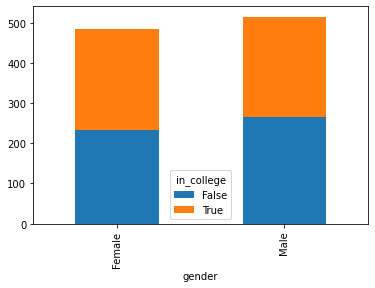

In [98]:
barplot('gender')

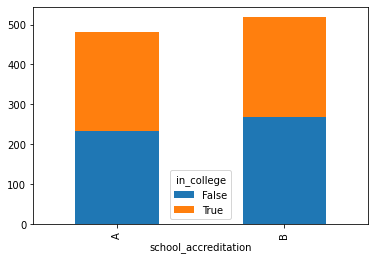

In [99]:
barplot('school_accreditation')

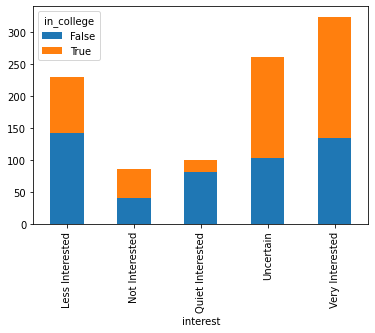

In [100]:
barplot('interest')

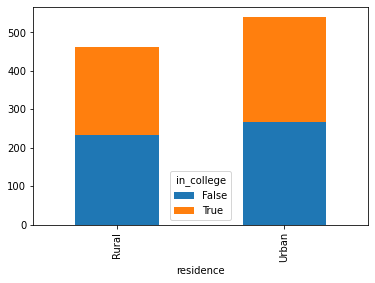

In [101]:
barplot('residence')

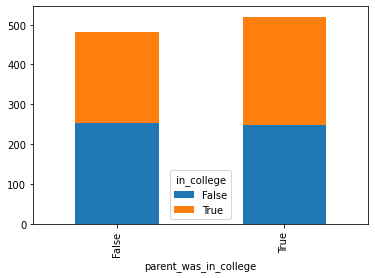

In [102]:
barplot('parent_was_in_college')

In [146]:
def catplotsns(column):
    sns.catplot(x = "in_college", y=column, kind="violin", data = df)

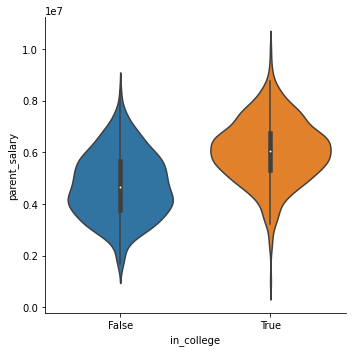

In [147]:
catplotsns("parent_salary")

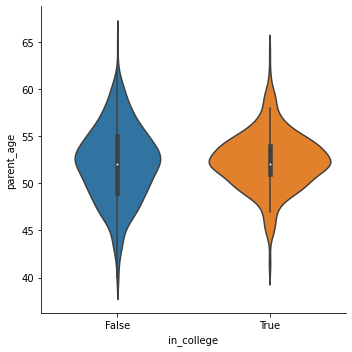

In [148]:
catplotsns("parent_age")

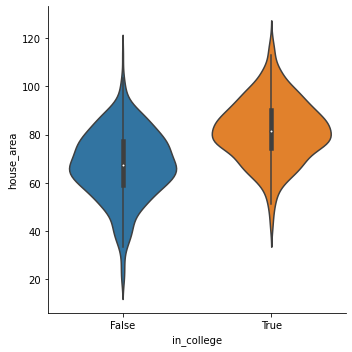

In [151]:
catplotsns("house_area")

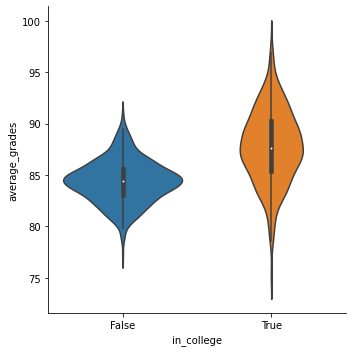

In [150]:
catplotsns("average_grades")

### Training

In [139]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


#### 1.Logistic regression
all data must be normalized to the interval [0, 1]

In [210]:
df['interest'].unique()

array(['Less Interested', 'Very Interested', 'Uncertain',
       'Not Interested', 'Quiet Interested'], dtype=object)

In [293]:
categorcol = ['type_school', 'school_accreditation', 'gender', 
          'residence', 'parent_was_in_college', 'in_college']
enc = preprocessing.OrdinalEncoder()
enc.fit(df[categorcol])
dfnorm1 = pd.DataFrame(enc.transform(df[categorcol]), columns = categorcol).astype(int)
df = df.replace({'interest' : { 'Not Interested' : 0, 'Less Interested' : 0.25, 
                            'Uncertain' : 0.5, 'Quiet Interested' : 0.75,
                            'Very Interested' : 1}})
continuoscol = ['parent_age', 'parent_salary', 'house_area', 'average_grades']
scaler = preprocessing.MinMaxScaler()
dfnorm2 = pd.DataFrame(scaler.fit_transform(df[continuoscol]), columns = continuoscol)
#dfnorm2 = pd.DataFrame(preprocessing.normalize(df[continuoscol], axis = 0), columns = continuoscol)
dfnorm = pd.concat([dfnorm1, df['interest'], dfnorm2], axis=1)

In [294]:
dfnorm.head()

,type_school,school_accreditation,gender,residence,parent_was_in_college,in_college,interest,parent_age,parent_salary,house_area,average_grades
0,0,0,1,1,0,1,0.25,0.64,0.661111,0.630,0.395217
1,0,0,1,1,0,1,0.25,0.68,0.378889,0.568,0.517826
2,0,1,0,1,0,1,1.00,0.40,0.611111,0.606,0.540435
3,1,1,1,0,1,1,1.00,0.36,0.622222,0.582,0.309565
4,0,0,0,1,0,0,1.00,0.68,0.472222,0.551,0.512609


In [295]:
dfx = dfnorm.drop('in_college', axis=1)
dfy = dfnorm['in_college']
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)

In [314]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.89

#### 2. K-Nearest neighbor

In [315]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
nca_pipe.score(X_test, y_test)

0.845

#### 3. SVM

In [301]:
clf = svm.SVC().fit(X_train, y_train)
predsvm = clf.predict(X_test)
clf.score(X_test, y_test)

0.88

#### 4.Desicion tree

In [304]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.87

In [308]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.87